In [1]:
print("This program will predict stock price prediction using XGBoost")
# make sure you have the csv file in the same directory as your python code

This program will predict stock price prediction using XGBoost


<Axes: >

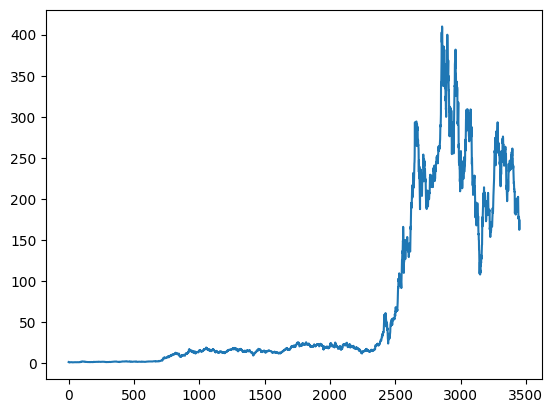

In [2]:
################################ Importing all the packages ##################################

import pandas as pd # getting the pandas package
import xgboost as xgb # the actual ml framework we are using
import matplotlib.pyplot as plt # package to produce graphs
import numpy as np # used to perform mathematical operations on arrays
import os
import time


data = pd.read_csv('TSLA.csv') # make sure the csv file has dataset covering a good amount of years
data # shows the dataset

data['Close'].plot() # using the close column for our stock price prediction


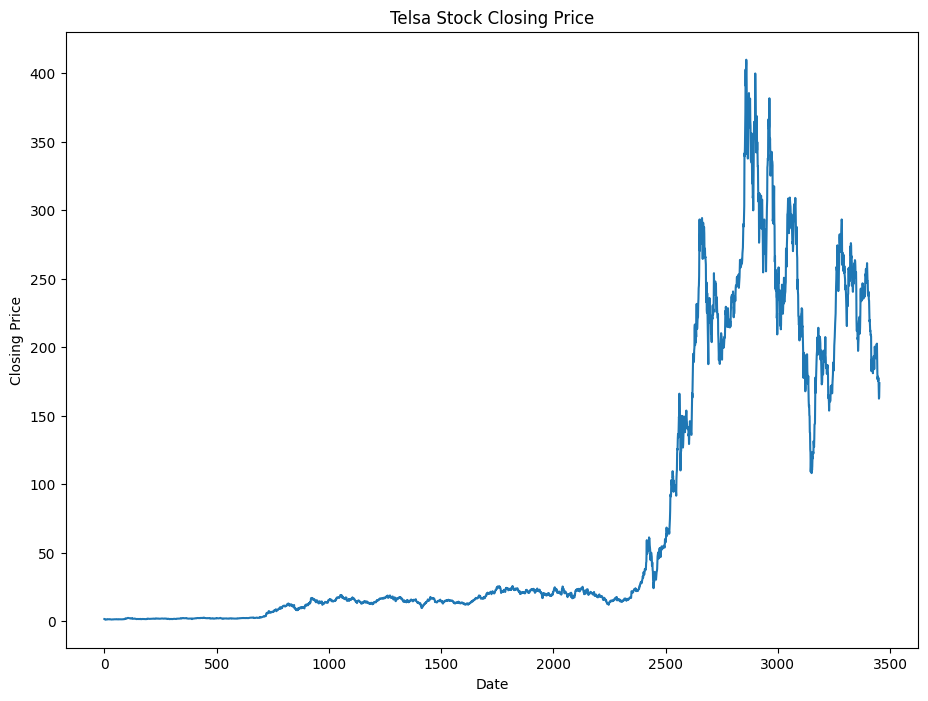

In [3]:
############## Plotting the graph with labels ###################
plt.figure(figsize=(11,8))
plt.title("Telsa Stock Closing Price")
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel("Closing Price")
plt.show()

In [6]:
data = data[["Close"]] # close column
data['target'] = data.Close.shift(-1)

data.loc[:, 'target'] = data['Close'].shift(-1)

data # There is a null target value at the last row since it doesn't have a target

data.dropna(inplace = True) # drop null values so that it doesn't affect our model
data


# Split - train and test

def train_test(dataset, ratio ): # these paramters just define what will happen if the user calls the function
  dataset = dataset.values
  split_data = int(len(dataset) * (1-ratio)) # ratio indicates that ratio of the data will be used for testing
  return dataset[:split_data], dataset[split_data:]


In [5]:
train, test = train_test(data, 0.2) # split into 80% for training, 20% for testing

The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters are  {'learning_rate': 0.04, 'n_estimators': 900}
The best hyperparameters 

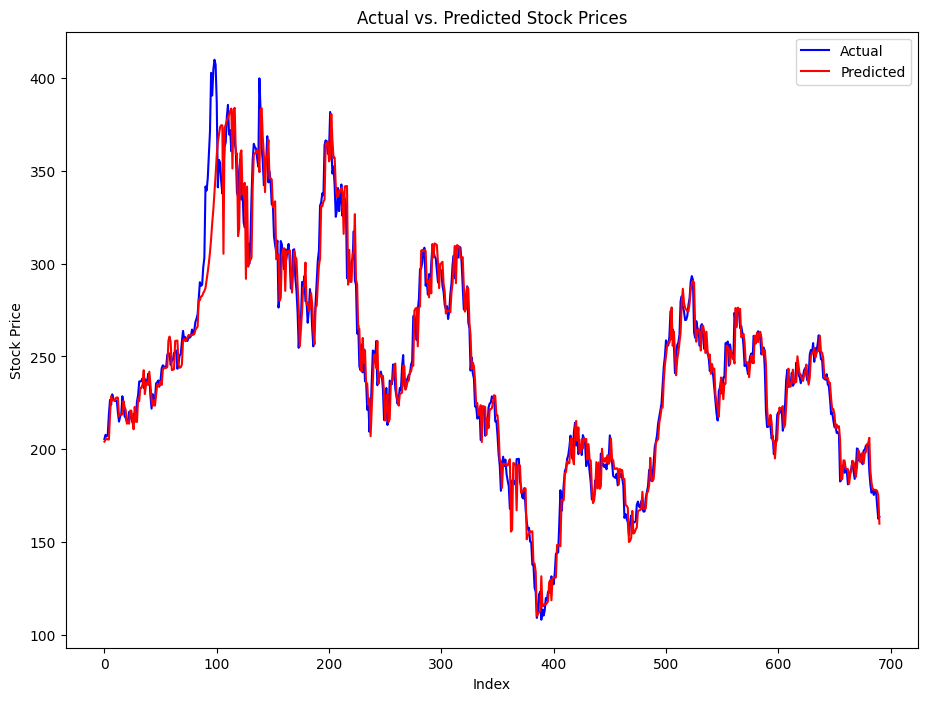

In [8]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

hyperparam_counts = {}  # Define hyperparam_counts as a global variable

def predict(train, value):

    train = np.array(train)
    X = train[:, :-1]  # selects all rows of the close column from the train data
    Y = train[:, -1]  # Selects all rows of the target column from the train data

    # Calculate the index to start sampling from (last 5% of the data)
    sample_start_index = int(len(X) * 0.95)

    # Create a smaller sample of the dataset for hyperparameter tuning
    X_sample = X[sample_start_index:]
    Y_sample = Y[sample_start_index:]

    # putting a rate of hyperaprameters so that the program can find out which is the optimum hyperparameter for our model
    param_grid = {
        "n_estimators": [900, 1000, 1100],
        "learning_rate": [0.040, 0.045, 0.050]
    }

    search = GridSearchCV(XGBRegressor(objective="reg:squarederror"), param_grid, cv=5)
    search.fit(X_sample, Y_sample)

    print("The best hyperparameters are ", search.best_params_)

    # Use the best hyperparameters found by grid search
    best_n_estimators = search.best_params_['n_estimators']
    best_learning_rate = search.best_params_['learning_rate']

    model = XGBRegressor(objective="reg:squarederror", n_estimators=best_n_estimators, learning_rate=best_learning_rate)
    model.fit(X, Y)

    value = np.array(value).reshape(1, -1)
    predict = model.predict(value)
    return predict[0]


def validate(dataset, ratio):

    predictions = []
    train, test = train_test(dataset, ratio)

    history = [x for x in train]

    for i in range(len(test)):

        test_X, test_Y = test[i, :-1], test[i, -1]
        prediction = predict(history, test_X[0])
        predictions.append(prediction)
        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions, squared=False)

    return error, test[:, -1], predictions


def update_hyperparam_counts(params):
    global hyperparam_counts
    key = tuple(params.items())
    hyperparam_counts[key] = hyperparam_counts.get(key, 0) + 1


# Assuming you have defined train_test function

# Call the validate function with your data
rmse, y, pred = validate(data, 0.2)
print(rmse)

# plots the predicted vs actual graph
plt.figure(figsize=(11, 8))
plt.plot(y, label='Actual', color='blue')
plt.plot(pred, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()
